To work with the notebook:
1. Start the first two cells
2. Restart the rantime
3. Run all the total code (do not run the first two cells again)

This notebook runs the DeepFloorplan model.
I didn't really like the results in the test image so I worked with another approaches.

In [ ]:
!git clone -b main https://github.com/zcemycl/TF2DeepFloorplan.git
!pip install gdown
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON
!unzip log.zip
!rm log.zip

In [ ]:
# gpu
# !cd TF2DeepFloorplan && pip install -e .[tfgpu]
# cpu|
!cd TF2DeepFloorplan && pip install -e .[tfcpu]

In [1]:
import tensorflow as tf
import sys
from dfp.net import *
from dfp.data import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from argparse import Namespace
import os
import gc
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
from dfp.utils.rgb_ind_convertor import *
from dfp.utils.util import *
from dfp.utils.legend import *
from dfp.utils.settings import *
from dfp.deploy import *
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

False
[]


In [2]:
img_path = '/kaggle/input/data-test/Screenshot 2024-09-17 at 2.58.19PM.png'
inp = mpimg.imread(img_path)
args = parse_args("--tomlfile ./TF2DeepFloorplan/docs/notebook.toml".split())
args = overwrite_args_with_toml(args)
args.image = img_path

In [3]:
result = main(args)

58889256/58889256 [==============================] - 3s 0us/step


/kaggle/working/TF2DeepFloorplan/src/dfp/utils/util.py:34: UserWarning: ignoring size because footprint is set
  ndimage.grey_erosion(output_array, size=(3, 3), footprint=el),


(870, 458, 3) (870, 458, 3)


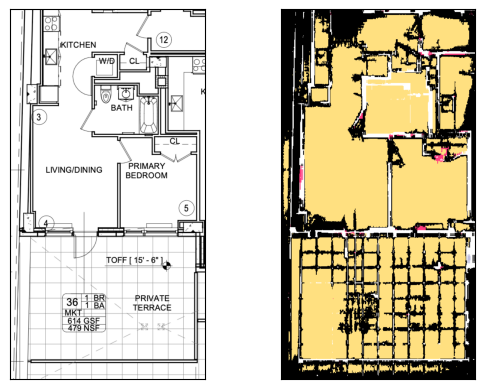

In [4]:
plt.subplot(1,2,1)
plt.imshow(inp); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(result); plt.xticks([]); plt.yticks([]);

In [5]:
model,img,shp = init(args)
logits_cw,logits_r = predict(model,img,shp)

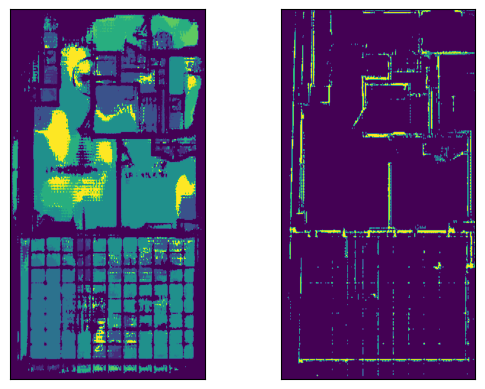

In [6]:
logits_r = tf.image.resize(logits_r,shp[:2])
logits_cw = tf.image.resize(logits_cw,shp[:2])
r = convert_one_hot_to_image(logits_r)[0].numpy()
cw = convert_one_hot_to_image(logits_cw)[0].numpy()
plt.subplot(1,2,1)
plt.imshow(r.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw.squeeze()); plt.xticks([]); plt.yticks([]);

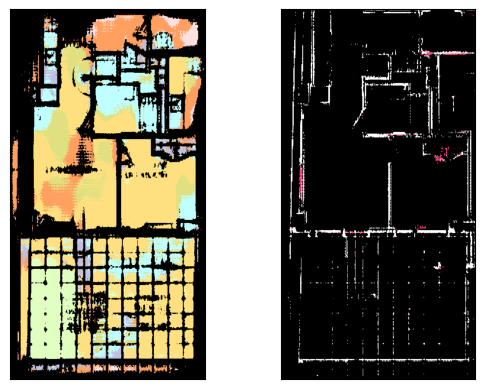

In [7]:
r_color,cw_color = colorize(r.squeeze(),cw.squeeze())
plt.subplot(1,2,1)
plt.imshow(r_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw_color); plt.xticks([]); plt.yticks([]);

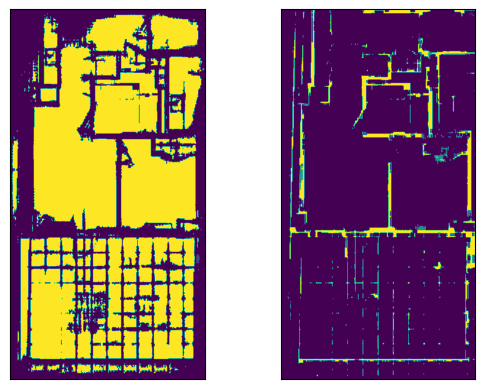

In [8]:
newr,newcw = post_process(r,cw,shp)
plt.subplot(1,2,1)
plt.imshow(newr.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw.squeeze()); plt.xticks([]); plt.yticks([]);

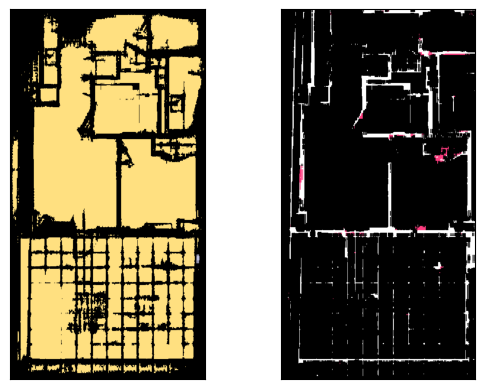

In [9]:
newr_color,newcw_color = colorize(newr.squeeze(),newcw.squeeze())
plt.subplot(1,2,1)
plt.imshow(newr_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw_color); plt.xticks([]); plt.yticks([]);

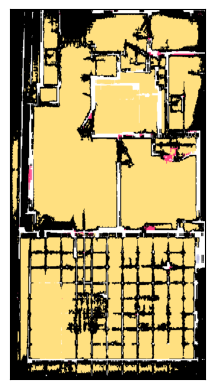

In [10]:
plt.imshow(newr_color+newcw_color); plt.xticks([]); plt.yticks([]);

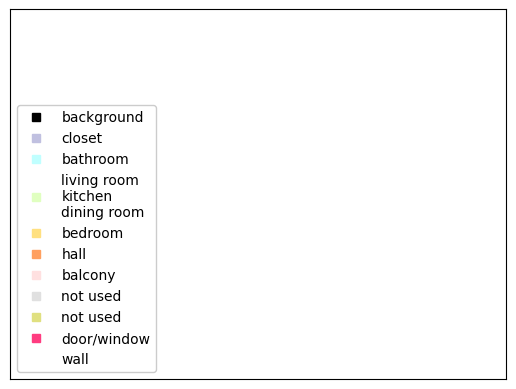

In [11]:
over255 = lambda x: [p/255 for p in x]
colors2 = [over255(rgb) for rgb in list(floorplan_fuse_map.values())]
colors = ["background", "closet", "bathroom",
          "living room\nkitchen\ndining room",
          "bedroom","hall","balcony","not used","not used",
          "door/window","wall"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors2[i]) for i in range(len(colors))]
labels = colors
legend = plt.legend(handles, labels, loc=3,framealpha=1, frameon=True)

fig  = legend.figure
fig.canvas.draw()
plt.xticks([]); plt.yticks([]);
